# CMSE 202 Midterm Section 004

The goal of this midterm is to give you the opportunity to test out some of the skills that you've developed thus far this semester. In particular, you'll reflect on what you know about writing code using Python and showcase some of your new programming skills.

**Important note about using online resources:** This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

**Do your own work.** This midterm is designed to give you the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the midterm.

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam.

If you have any questions during the exam, you may ask the instructor, the TA, or the LA privately; simply raise your hand and one of us will come over to you. **There are 85 points in total.**

### Content Knowledge Tested
- Using Github to save and track progress on your work
- Using Pandas to read, manipulate, and access data files
- Using documentation and examples to effectively utilitze unfamiliar Python packages 
- Writing new classes to effectively store complex datasets

## Part 0: Add to your Git repository to track your progress on your exam (7 points total)

Before you get to far along in the exam, you're going to add it to the `cmse202-S23-turnin` repository you created in class so that you can track your progress on the exam and preserve the final version that you turn in. In order to do this you need to

### &#9989; Part 0.1 (5 points):

1. Navigate to your `cmse202-S23-turnin` repository and create a new directory called `midterm`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" respository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

The file should now show up on your GitHub account in the `cmse202-S23-turnin` repository inside the `midterm` directory you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. It can be good to get into a habit of committing your changes any time you make a significant modification.

### Part 0.2 (2 points):
&#9989; Before you move on, **put the command(s) that your instructor should run to clone your repository in the markdown cell below.**

git clone https://github.com/coope494/CMSE202-s23-turnin.git

## Part 1: Getting Data with Curl (3 points)

For this exam, you will be working with a dataset that contains **spectra.** Spectra are what you get when you separate light–like in a prism–and measure the flux (fancy word for brightness) of the different parts of the light (E.g., blue has a flux of 400, red has a flux of 600, etc.). More specifically, we measure the *wavelength* of the light (shorter wavelengths = bluer, longer wavelengths=redder). The data we’ll be working with came from a space telescope looking at different astronomical sources. 

For this exam, you only need to know that wavelength and flux are measured values used in astronomy, physics, chemistry, and biology. 


First, let’s get our data files. 

&#9989; **Download the files using `curl` and the following links. Put the commands you used to download the files in the cell below.**

 * `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/Midterm/metadata.csv`
 * `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/Midterm/flux_values.csv`
 * `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/Midterm/wavlength_values.csv`


In [1]:
!curl https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/Midterm/metadata.csv -o metadata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18761  100 18761    0     0  40166      0 --:--:-- --:--:-- --:--:-- 40173


In [2]:
!curl https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/Midterm/flux_values.csv -o flux_values.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  468k  100  468k    0     0   461k      0  0:00:01  0:00:01 --:--:--  461k


In [3]:
!curl https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/Midterm/wavlength_values.csv -o wavlength_values.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  902k  100  902k    0     0  1453k      0 --:--:-- --:--:-- --:--:-- 1452k


## Part 2: Reading the Data (5 points)

&#9989; **Read in the data files using Pandas (put your code in the cell below).** One of them has metadata about each source (every row is one object with the ID being in the first column), one of them has flux values for each source (where now each column is one object - cross-check the IDs), and the last one has the wavelength values for each source (same as flux). 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import sklearn as skl
from sklearn import metrics

In [35]:
metadata = pd.read_csv('metadata.csv')

flux_data = pd.read_csv('flux_values.csv')
#flux_data = pd.read_csv('flux_values.csv').transpose()

wavlength_data = pd.read_csv('wavlength_values.csv')
#wavlength_data = pd.read_csv('wavlength_values.csv').transpose()

In [36]:
metadata

,ID,RA,DEC,Scale Factor
0,12043-6225,12.073,-62.428,1.250000e-16
1,12063-6259,12.106,-62.987,2.970000e-16
2,12073-6233,12.123,-62.554,3.130000e-15
3,12148-6741,12.247,-67.683,1.730000e-15
4,12216-6218,12.360,-62.303,2.180000e-16
...,...,...,...,...
526,23491+6243,23.819,62.732,2.220000e-16
527,23496+6131,23.827,61.526,1.250000e-15
528,23528+4821,23.881,48.360,5.740000e-16
529,23541+7031,23.902,70.526,4.120000e-16


In [37]:
flux_data

,12043-6225,12063-6259,12073-6233,12148-6741,12216-6218,12226+0102,12230-5943,12233-5920,12247-5842,12274-7647,...,23309+2213,23320+4316,23365+5159,23416+6130,23439+5412,23491+6243,23496+6131,23528+4821,23541+7031,23564-5651
0,4119.1675,7660.9990,3196.4287,26028.45100,15835.38500,15979.91200,13409.69200,4723.84230,24852.15600,7437.99200,...,25954.22500,13512.42800,11504.02050,5428.5894,15511.47700,14111.7340,8702.8700,15375.60400,11814.4600,14268.03700
1,4897.2990,7906.7840,3013.9722,23706.81400,15097.69700,15094.21800,12985.14700,5399.35500,23494.65800,7775.49300,...,24277.15000,13566.23500,10776.77200,5152.7850,15633.45800,14462.1270,8777.9060,14542.23300,12896.9450,12925.04500
2,4163.9690,7821.8984,3003.1490,21255.06600,14774.41800,15370.21200,12330.41200,5080.29300,21760.83000,8206.88100,...,21686.77500,14101.02300,10377.47100,5084.3320,15354.94700,15572.4560,9042.6650,13849.16300,13033.3150,12433.29800
3,5000.7207,7240.5156,3099.5684,19268.29700,15353.48500,15239.36900,11932.74500,4978.89100,20237.52300,9054.72200,...,20223.47300,13942.72900,10156.50100,5017.1060,13779.85800,15107.5140,9054.9300,13149.55700,13371.6440,12211.93400
4,5769.1810,6555.7860,3130.7747,17711.97000,13989.90700,15328.07800,11440.46900,4896.74850,18943.15200,9833.83900,...,18529.77100,13366.01100,9721.12200,5255.4404,13604.02700,14094.1240,9358.4030,12263.95500,12632.2850,12230.37700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1767.6233,7084.0360,6564.2630,448.98490,693.25110,473.87660,739.24524,1184.99270,440.24020,1112.40630,...,549.65270,921.79126,971.99790,2025.3147,790.83856,687.2263,1236.9054,843.16656,1721.3413,757.24786
89,1146.9471,6971.7830,6309.6396,459.61176,890.75964,377.22030,620.88495,1124.36790,264.00620,1024.37740,...,449.71590,894.86224,1010.25600,1978.9023,440.02040,686.3428,1208.3124,642.11680,1546.4460,695.35840
90,1392.4745,7015.5747,5954.3880,409.13416,473.78302,368.36404,680.48940,983.02160,437.77075,994.52313,...,569.08490,886.43270,998.65643,1950.6804,353.10380,934.4911,1203.8910,824.46655,1677.9924,702.66327
91,1278.9945,6962.2200,5337.8887,366.62670,658.46140,548.61140,723.15520,919.66736,361.53516,1020.19920,...,471.92410,850.96300,872.36680,1858.1993,875.61270,933.5919,1099.1929,703.36536,1601.7352,681.01196


In [38]:
wavlength_data

,12043-6225,12063-6259,12073-6233,12148-6741,12216-6218,12226+0102,12230-5943,12233-5920,12247-5842,12274-7647,...,23309+2213,23320+4316,23365+5159,23416+6130,23439+5412,23491+6243,23496+6131,23528+4821,23541+7031,23564-5651
0,7.860251,7.862759,7.864406,7.864011,7.864883,7.861944,7.870065,7.859010,7.863359,7.864565,...,7.864798,7.861496,7.856951,7.861483,7.862815,7.861386,7.861062,7.871683,7.872028,7.858041
1,8.054492,8.052193,8.041659,8.050639,8.040395,8.045418,8.050928,8.047220,8.053614,8.051108,...,8.047529,8.045410,8.045976,8.058945,8.050414,8.045272,8.052644,8.050345,8.054690,8.061917
2,8.226692,8.232277,8.230711,8.227723,8.228763,8.238504,8.229733,8.230733,8.230070,8.233486,...,8.241394,8.231385,8.221734,8.230750,8.230825,8.228073,8.229939,8.230677,8.224249,8.229404
3,8.396819,8.404827,8.400978,8.405921,8.407011,8.403179,8.402961,8.409550,8.405349,8.398662,...,8.414162,8.406240,8.405529,8.401249,8.399691,8.396961,8.407896,8.407431,8.405985,8.399666
4,8.585093,8.569422,8.574238,8.571307,8.565902,8.579400,8.574756,8.578492,8.585618,8.578084,...,8.582309,8.580029,8.570278,8.559317,8.582286,8.575124,8.581448,8.582294,8.565852,8.568000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,22.180003,22.184494,22.185389,22.181462,22.177691,22.172304,22.171730,22.174125,22.165366,22.166268,...,22.174577,22.180111,22.173661,22.177149,22.178878,22.174507,22.165240,22.172386,22.177836,22.173068
89,22.361373,22.368408,22.358518,22.367017,22.352578,22.373684,22.348355,22.364276,22.371429,22.361821,...,22.360726,22.362492,22.358195,22.367452,22.365275,22.361178,22.364981,22.352888,22.362766,22.369081
90,22.551057,22.551896,22.558641,22.556461,22.548741,22.552584,22.550941,22.544012,22.554707,22.555612,...,22.546808,22.550837,22.558427,22.547961,22.551920,22.549466,22.561956,22.554048,22.548523,22.549279
91,22.734353,22.738269,22.741007,22.740697,22.741439,22.725805,22.733217,22.738103,22.728719,22.740318,...,22.738795,22.740553,22.736354,22.748423,22.734862,22.739534,22.744856,22.729730,22.729036,22.743119


## Part 3: Using a "New" Package (15 points)
For this problem, we want you to use a new package that you aren’t as used to. Specifically, you’ll be using the [Seaborn plotting package](https://seaborn.pydata.org/). 

&#9989; RA and DEC are two measurements that are equivalent to latitude and longitude on earth (I.e., they give the position on the sky). **Use the Seaborn `relplot` and your metadata dataframe to make a scatter plot of the following:** 

- RA on the x-axis 
- DEC on the y-axis 
- The size of your data points on the plot should correspond to the scale factor (a measure of total brightness of the source.) 

**Hint:** You might want to take a look at the Seaborn example gallery. 

In [39]:
metadata.loc[:, "Scale Factor"]*=(10**16)
sizes_list = [*set(list(metadata["Scale Factor"]))]

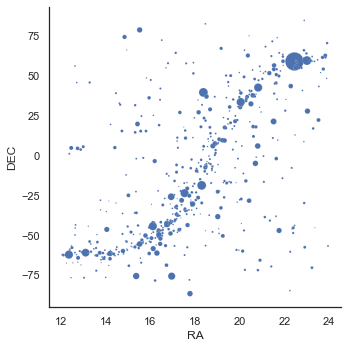

In [40]:
import seaborn as sns
sns.set_theme(style="white")

sns.relplot(x="RA", y="DEC", size="Scale Factor", sizes=sizes_list, legend = False, data=metadata)

---
### &#128721; STOP (1 point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit and push the changes to your Git repository.

---

## Part 4: Accessing Specific Data Values with Pandas (15 points)

For this part of the exam, we’ll walk through how to use Pandas to access specific pieces of information in our dataframes.

### 4.1 Getting the Metadata (5 points)

&#9989; **Use Pandas to access the value in the the 3rd row and 2nd column in the metadata dataframe (I.e., the RA for 12073-6233).** *Hint: What is the easiest way to access data using index values?*

In [41]:
metadata.loc[2, 'RA']

12.123

### 4.2 Getting Flux Data (5 Points)

&#9989; **Use Pandas to access the entire second column of data in the flux dataframe (I.e., all flux values for 12063-6259).** Try to use the same tools as the previous problem.

In [47]:
flux_data.loc[:, list(flux_data.columns)[1]]

0     7660.9990
1     7906.7840
2     7821.8984
3     7240.5156
4     6555.7860
        ...    
88    7084.0360
89    6971.7830
90    7015.5747
91    6962.2200
92    6263.4400
Name: 12063-6259, Length: 93, dtype: float64

### 4.3 Getting Wavelength Data (5 Points)

&#9989; **Use Pandas to access the entire third column of data in the wavelength dataframe (I.e., all wavelength values for 12073-6233).** Try to use the same tools as the previous two parts.

In [48]:
flux_data.loc[:, list(flux_data.columns)[2]]

0     3196.4287
1     3013.9722
2     3003.1490
3     3099.5684
4     3130.7747
        ...    
88    6564.2630
89    6309.6396
90    5954.3880
91    5337.8887
92    4638.5244
Name: 12073-6233, Length: 93, dtype: float64

## Part 5: Designing a Class (15 points)

The issue with this dataset is that it comes in two parts: the spectra and the metadata for each source. To make life easier, we’re going to combine both the data and the metadata by designing a new class, the `Spectrum` class.

&#9989; **Write a new class for this spectrum data.** Your class should have the following: 
- Attributes for each piece of information in the metadata file (I.e., ID, RA, DEC, and Scale Factor)
- Wavelengths 
- Flux 
- `get`-methods for both wavelength and flux (for the sake of time, you don’t need to write `set`-methods or `get`-methods for any of the other attributes).

In [49]:
class Spectrum:
    
    def __init__(self, ID, RA, DEC, scale_factor, wavelengths, flux):
        self.ID = ID
        self.RA = RA
        self.DEC = DEC
        self.scale_factor = scale_factor
        self.wavelengths = wavelengths
        self.flux = flux
        
    def get_wavelengths(self):
        return self.wavelengths
    
    def get_flux(self):
        return flux

IndentationError: expected an indented block (2336175901.py, line 3)

---
### &#128721; STOP (1 point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit  and push the changes to your Git repository.

---

## Part 6: Building Objects (15 points)

&#9989; **Construct `Spectrum` objects for all of the spectral measurements. Append all of the objects to a new list called `spectrum_objects`.** Make sure to think that each object is stored on **one row** in the `meta` dataframe but in **one column** in both `flux` and `wavelength` DataFrames. 

In [14]:
#Write your code here

## Part 7: Scaling Flux Values (12 points)

*Note: You can complete parts 7.1 and 7.2 even if you did not complete Part 6*

### Part 7.1: Fixing the Problem (4 points)
&#9989; **All of the flux values need to be scaled (multiplied) by the `scale_factor` value. Store the `scale_factor` in the class. Then write a new method in your `spectrum` class that scales it.** 



In [ ]:
#Write your code here

### Part 7.2: Applying the Fix (4 points)
&#9989; **Call your method within the constructor method (I.e., the `__init__` method), so that it automatically scales the flux values as it creates a new `spectrum` object.**

In [39]:
#Write your code here

### Part 7.3: Rebuilding (4 points)
&#9989; **Rerun your code from Part 6 to rebuild your objects with properly scaled flux values.**

In [ ]:
#Write your code here

## Part 8: Make a Plot (10 points)

&#9989; **Select one of your spectrum objects and use it to make a plot. Your plot should have Wavelength on the x-axis and flux on the y-axis.**

*Note: You can complete this problem even if you did not complete Part 6 or 7. As long as you have A spectrum object.*

In [22]:
#Write your code here

---
### &#128721; STOP (1 point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit  and push the changes to your Git repository.

---

## You're done! Congrats on finishing your CMSE 202 Midterm!

Make sure all of your changes to your repository are committed and pushed to GitHub. Also upload a copy of this notebook to the dropbox on D2L in case something went wrong with your repository or if you couldn't get the repository to work.